# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## READING CSV FILES

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
5,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries",The arrival of a charismatic young priest brin...
6,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",NaN,"September 24, 2021",2021,PG,91 min,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s..."
8,s9,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 24, 2021",2021,TV-14,9 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...


In [3]:
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## checking data for null values

In [5]:
df.isnull().mean()*100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

## Filling in Default Values to Null Values for further Analysis of Data

In [6]:
df['director'] = df['director'].fillna('unknown')
df['director'].isnull().sum()


0

In [7]:
df['cast'] = df['cast'].fillna('unknown')
df['cast'].isnull().sum()

0

In [8]:
df['country'] = df['country'].fillna('unknown')
df['country'].isnull().sum()

0

In [9]:
df.shape

(8807, 12)

In [10]:
df.dropna(inplace=True)
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [11]:
df['country'] = df['country'].apply(lambda x:x.capitalize())
df['country'].head()

0    United states
1     South africa
2          Unknown
3          Unknown
4            India
Name: country, dtype: object

In [12]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown,United states,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown,unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United states,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown,unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United states,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United states,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [13]:
df[['date_added','release_year']]

,date_added,release_year
0,"September 25, 2021",2020
1,"September 24, 2021",2021
2,"September 24, 2021",2021
3,"September 24, 2021",2021
4,"September 24, 2021",2021
...,...,...
8802,"November 20, 2019",2007
8803,"July 1, 2019",2018
8804,"November 1, 2019",2009
8805,"January 11, 2020",2006


### splitting the added date column to have months and year separated

In [14]:
df['added_month'] = df['date_added'].apply(lambda x:x.split(',')[0].split()[0])
df['added_year'] = df['date_added'].apply(lambda x:x.split(',')[1])
df[['added_month','added_year']]

,added_month,added_year
0,September,2021
1,September,2021
2,September,2021
3,September,2021
4,September,2021
...,...,...
8802,November,2019
8803,July,2019
8804,November,2019
8805,January,2020


In [15]:
df.drop('date_added', axis=1, inplace = True)
df['added_year'] = df['added_year'].astype(int)

In [16]:
df.drop(df[df['added_year']<df['release_year']].index, inplace=True)

In [17]:
df.shape

(8776, 13)

### basic analysis on the type of Content i.e Movie or TV Show

In [18]:
df['type'].nunique()

2

In [19]:
type_counts = df['type'].value_counts()
type_counts

type
Movie      6124
TV Show    2652
Name: count, dtype: int64

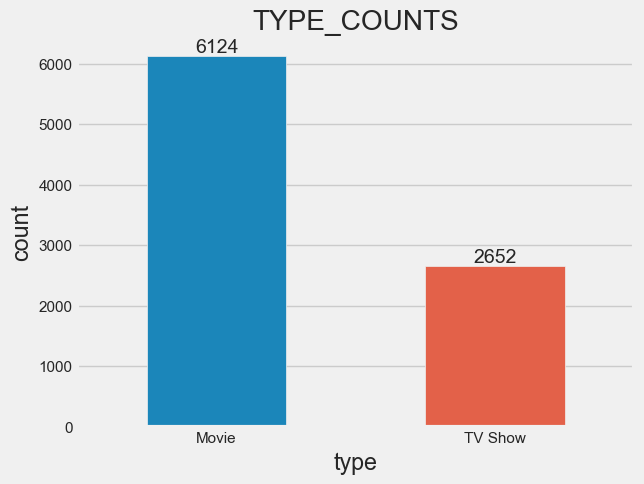

In [75]:
fig = sns.countplot(x = df['type'],width=0.5)
plt.title('TYPE_COUNTS')
fig.bar_label(fig.containers[0])
plt.show()

In [42]:
print(f'On Netflix,{round((type_counts[0]/type_counts.sum())*100,2)}% are Movie and {round((type_counts[1]/type_counts.sum())*100,2)}% are TV show')


On Netflix,69.78% are Movie and 30.22% are TV show


C:\Users\Admin\AppData\Local\Temp\ipykernel_17224\822230120.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f'On Netflix,{round((type_counts[0]/type_counts.sum())*100,2)}% are Movie and {round((type_counts[1]/type_counts.sum())*100,2)}% are TV show')


## On Netflix,69.78% are Movie and 30.22% are TV show

In [43]:
df['director'].nunique()

4524

In [77]:
director_counts = df['director'].value_counts()
director_counts.nlargest(10)

director
unknown                   2610
Rajiv Chilaka               19
Raúl Campos, Jan Suter      18
Marcus Raboy                16
Suhas Kadav                 16
Jay Karas                   14
Cathy Garcia-Molina         13
Jay Chapman                 12
Youssef Chahine             12
Martin Scorsese             12
Name: count, dtype: int64

In [24]:
df['country'].nunique()


746

In [76]:

country_counts = df['country'].value_counts()
country_counts.nlargest(10)

country
United states     2803
India              972
Unknown            829
United kingdom     418
Japan              243
South korea        199
Canada             181
Spain              145
France             123
Mexico             110
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

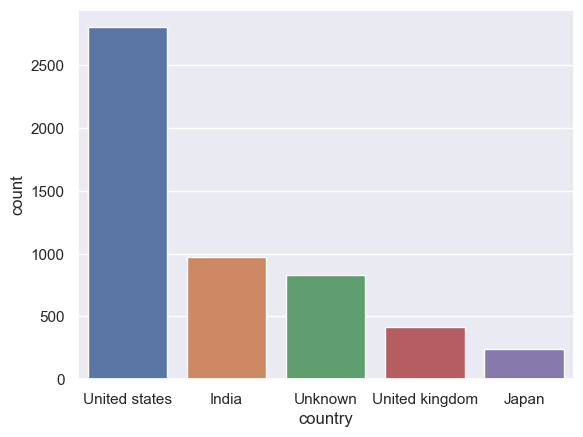

In [26]:
top_countries = country_counts.nlargest(5)
top_countries
sns.countplot(x  = df['country'], order = top_countries.index)

In [27]:
df['added_year'].nunique()


14

In [58]:
years = pd.Series(df['added_year'].unique())

In [56]:

df['added_year'].value_counts()
value = df['added_year'].value_counts()
values = pd.Series(value)
values

added_year
2019    2012
2020    1876
2018    1645
2021    1498
2017    1184
2016     424
2015      82
2014      24
2011      13
2013      10
2012       3
2009       2
2008       2
2010       1
Name: count, dtype: int64

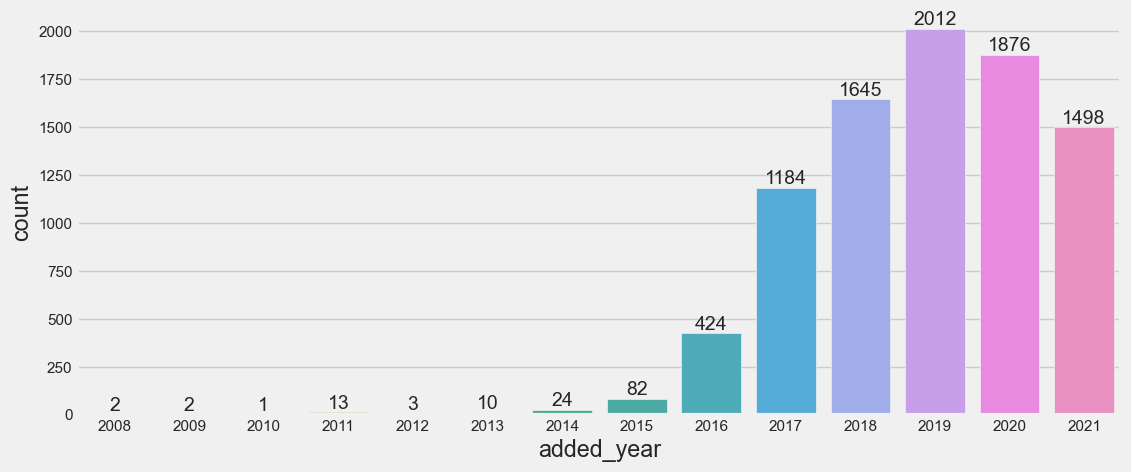

In [64]:
plt.figure(figsize=(12,5))
graph = sns.countplot(x = df['added_year'])
#graph.set_xticklabels(graph.get_xticklabels())
graph.bar_label(graph.containers[0])
plt.show()

In [30]:
df['added_month'].nunique()

12

In [68]:
df['added_month'].sort_values().value_counts()

added_month
July         826
December     808
September    769
April        763
October      757
August       754
March        740
January      737
June         728
November     703
May          630
February     561
Name: count, dtype: int64

[Text(0, 0, '769'),
 Text(0, 0, '754'),
 Text(0, 0, '826'),
 Text(0, 0, '728'),
 Text(0, 0, '630'),
 Text(0, 0, '763'),
 Text(0, 0, '740'),
 Text(0, 0, '561'),
 Text(0, 0, '737'),
 Text(0, 0, '808'),
 Text(0, 0, '703'),
 Text(0, 0, '757')]

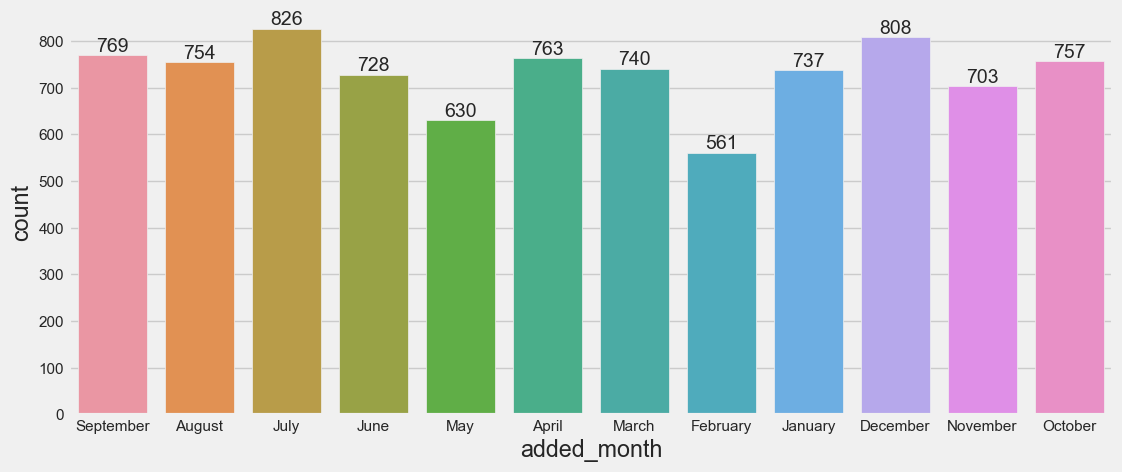

In [70]:
plt.figure(figsize=(12,5))
plot =sns.countplot(x = df['added_month'])
plot.bar_label(plot.containers[0])

In [33]:
df['rating'].nunique()

14

In [34]:
df['rating'].value_counts(normalize=True)

rating
TV-MA       0.364061
TV-14       0.245670
TV-PG       0.097995
R           0.091044
PG-13       0.055834
TV-Y7       0.037830
TV-Y        0.034754
PG          0.032703
TV-G        0.025068
NR          0.009002
G           0.004672
TV-Y7-FV    0.000684
NC-17       0.000342
UR          0.000342
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='rating'>

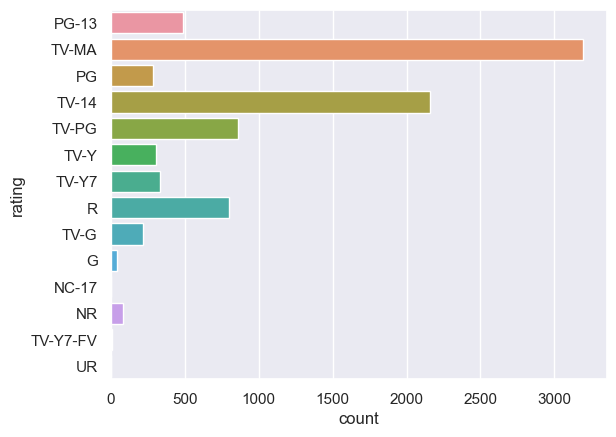

In [35]:
sns.countplot(y = df['rating'])

[Text(0, 0, '2055'),
 Text(0, 0, '893'),
 Text(0, 0, '439'),
 Text(0, 0, '206'),
 Text(0, 0, '76')]

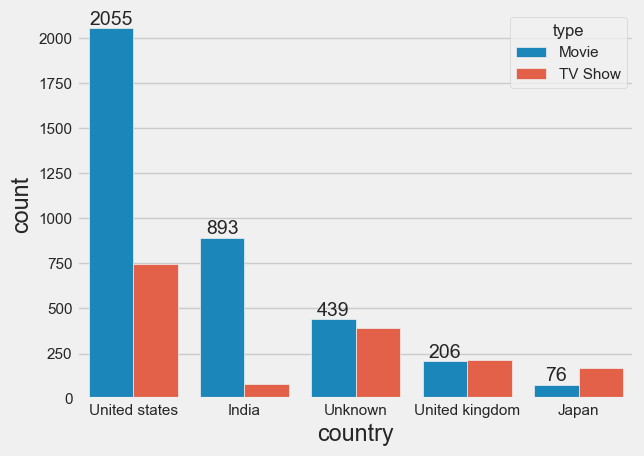

In [74]:
plot2= sns.countplot(x = df['country'], order = top_countries.index, hue = df['type'])


In [37]:
#In United states, Movies are more popular than TV shows.
#In India, Movies are more popular than TV shows.
#In United Kingdom, Movies and TV Show are equally popular.
#In Japan, TV Shows are more popular than Movies


<Axes: xlabel='country', ylabel='count'>

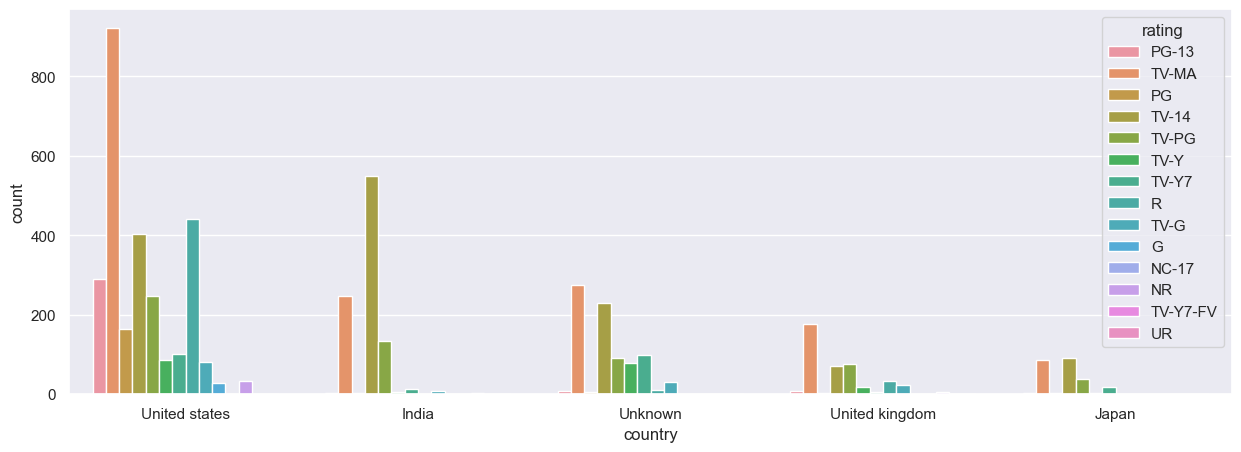

In [38]:
plt.figure(figsize=(15,5))
sns.countplot(x = df['country'], order = top_countries.index, hue =df['rating'] )

# Summary
* 69.78% of content on Netflix consists of movies, while 30.22% are TV shows.
* 'Rajiv Chilaka' has released the highest number of shows.
* A significant portion of Netflix shows originates from the USA and India.
* The highest number of shows was added in the year 2019.
* July and December stand out as the months when the highest number of shows are released.
* The most common ratings for shows on Netflix are 'TV-MA' and 'TV-14.'
* In the United States and India, movies are more popular than TV shows.
* In the United Kingdom, both movies and TV shows enjoy equal popularity.
* Conversely, in Japan, TV shows are more favored than movies.
* In the United States, most shows are rated 'TV-MA.'
* In India, the majority of shows have a 'TV-14' rating.
* The United Kingdom sees a prevalence of 'TV-MA' ratings.
* Finally, in Japan, the common rating for most shows is 'TV-14.